In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sys.path.insert(1, '../../data/')
from datasets import tanh_v2
sys.path.insert(1, '../../methods/')
from TriangularEstimators import ScaledCostOT

import torch


np.random.seed(10)

## Define dataset

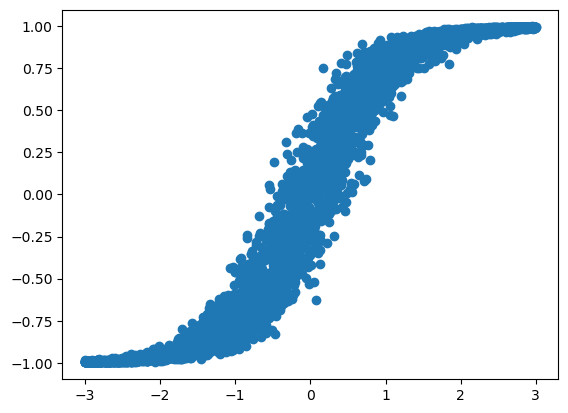

In [4]:
# define number of samples
N = 5000

# define class
pi = tanh_v2()

# define source samples
X = pi.sample_joint(N)
X_source = np.hstack((X[:,0][:,None], np.random.randn(N,1)))

# define target samples
X_target = pi.sample_joint(N)

plt.scatter(X_target[:,0],X_target[:,1])

## Instantial conditional estimation parameters

These parameters will be the same for all models

In [5]:
dim_x = dim_y = 1
beta = 1e-2 # N**(-1/5)

## Fit the various models to the data

In [16]:
### ICNN model
# n_iters_icnn = 1000 ### number of training iterations
# ot_icnn = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='ICNN', n_iters=n_iters_icnn) ## move this as a **args
# ot_icnn.fit(source=X_source, target=X_target.detach().numpy())
# print('Done ICNN')
# ### Nearest-Neighbor estimator
# ot_nn = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='NN')
# ot_nn.fit(source=X_source, target=X_target.detach().numpy())
# print('Done NN')
# ### Entropic map estimator
eps_ott = beta/10
n_inters_ott = 500
ot_ott = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='OTT',eps=eps_ott,debias=False)
ot_ott.fit(source=X_source, target=X_target.detach().numpy(), max_iter=n_inters_ott)
print('Done OTT')

Done OTT


In [ ]:
Ntest = int(5000)
y_locs = [-1.1,0,1.1]
nbins = 50

# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 3, figsize = (10,2.5))

for i,y in enumerate(y_locs):

    data_cond_y = np.hstack((np.ones((Ntest,1))*y, np.random.randn(Ntest,1)))
    # evaluate conditional density
    xx = np.linspace(-1.5,1.5,100)#[:,None]
    conditional_pdf = pi.conditional_pdf(y, xx)
    plt.subplot(1,3,i+1)
    plt.plot(xx, conditional_pdf, '-r')
    
#     YX_transp_icnn = ot_icnn.evaluate(data_cond_y)
#     ax.flatten()[i].hist(YX_transp_icnn[:,1], bins=nbins, density=True, label='MLP',alpha=.75)
    
#     YX_transp_nn = ot_nn.evaluate(data_cond_y)
#     ax.flatten()[i].hist(YX_transp_nn[:,1], bins=nbins, density=True, label='NN',alpha=.55)
    
#     YX_transp_ott = ot_ott.evaluate(data_cond_y)
#     ax.flatten()[i].hist(YX_transp_ott[:,1], bins=nbins, density=True, label='EOT',alpha=.35)
    
    YX_transp_bridge = ot_ott.evaluate_bridge(data_cond_y, tau=0.99, Nsteps=100)
    ax.flatten()[i].hist(YX_transp_bridge[:,1], bins=nbins, density=True, label='SB',alpha=.55)

    ax.flatten()[i].legend(loc='upper left')
    ax.flatten()[i].set_title(r'$y^* = {y}$')
    ax.flatten()[i].set_ylim(0, 6.)
    ax.flatten()[i].tick_params(left = False, right = False , labelleft = False) #labelbottom = False, bottom = False) 


/Users/apooladian/KRMapEstimation_private/examples/2D/../../data/datasets.py:209: RuntimeWarning: invalid value encountered in arctanh
  n = np.arctanh(y) - x
